##  Exploratory Data Analysis (EDA)

### Importing Libraries

In [2]:
# Import libraries for data exploration and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For notebook display
%matplotlib inline

### Loading the Dataset

In [8]:
# Load the dataset (update path if needed)
import os
csv_path = '../data/raw/LC_loans_granting_model_dataset.csv'
if not os.path.exists(csv_path):
    # try alternative path (when running from repo root)
    csv_path = 'data/raw/LC_loans_granting_model_dataset.csv'

print('Using file:', csv_path)
df = pd.read_csv(csv_path)
df.head()

Using file: ../data/raw/LC_loans_granting_model_dataset.csv


,id,issue_d,revenue,dti_n,loan_amnt,fico_n,experience_c,emp_length,purpose,home_ownership_n,addr_state,zip_code,Default,title,desc
0,68407277,Dec-15,55000.0,5.91,3600,677.0,1,10+ years,debt_consolidation,MORTGAGE,PA,190xx,0,Debt consolidation,NaN
1,68355089,Dec-15,65000.0,16.06,24700,717.0,1,10+ years,small_business,MORTGAGE,SD,577xx,0,Business,NaN
2,68341763,Dec-15,71000.0,13.85,20000,697.0,1,10+ years,home_improvement,MORTGAGE,IL,605xx,0,NaN,NaN
3,68476807,Dec-15,104433.0,25.37,10400,697.0,1,3 years,major_purchase,MORTGAGE,PA,174xx,0,Major purchase,NaN
4,68426831,Dec-15,34000.0,10.20,11950,692.0,1,4 years,debt_consolidation,RENT,GA,300xx,0,Debt consolidation,NaN


In [9]:
# 1. Inspect dataset: shape, dtypes, missing values, basic stats
print('Shape:', df.shape)
print('\nData types:')
print(df.dtypes)
print('\nMissing values:')
print(df.isnull().sum().sort_values(ascending=False).head(20))

# Basic descriptive statistics
print('\nDescriptive stats for numerical columns:\n')
print(df.describe().T)

# Show memory usage
print('\nMemory usage:')
print(df.memory_usage(deep=True))

# Display first and last few rows
print('\nFirst 5 rows:')
print(df.head())
print('\nLast 5 rows:')
print(df.tail())

Shape: (1048575, 15)

Data types:
id                    int64
issue_d              object
revenue             float64
dti_n               float64
loan_amnt             int64
fico_n              float64
experience_c          int64
emp_length           object
purpose              object
home_ownership_n     object
addr_state           object
zip_code             object
Default               int64
title                object
desc                 object
dtype: object

Missing values:
desc                997510
title                13369
zip_code                 1
id                       0
issue_d                  0
revenue                  0
dti_n                    0
loan_amnt                0
fico_n                   0
experience_c             0
emp_length               0
purpose                  0
home_ownership_n         0
addr_state               0
Default                  0
dtype: int64

Descriptive stats for numerical columns:

                  count          mean           std   

In [10]:
# 2. Target variable distribution
# Update target_col to your real target column name
target_col = 'target'
if target_col in df.columns:
    print(df[target_col].value_counts())
    plt.figure(figsize=(6,4))
    sns.countplot(x=target_col, data=df)
    plt.title('Target Variable Distribution')
    plt.show()
else:
    print(f"Target column '{target_col}' not found in dataframe. Available columns:\n{df.columns.tolist()}")

Target column 'target' not found in dataframe. Available columns:
['id', 'issue_d', 'revenue', 'dti_n', 'loan_amnt', 'fico_n', 'experience_c', 'emp_length', 'purpose', 'home_ownership_n', 'addr_state', 'zip_code', 'Default', 'title', 'desc']


Numerical columns: ['id', 'revenue', 'dti_n', 'loan_amnt', 'fico_n', 'experience_c', 'Default']


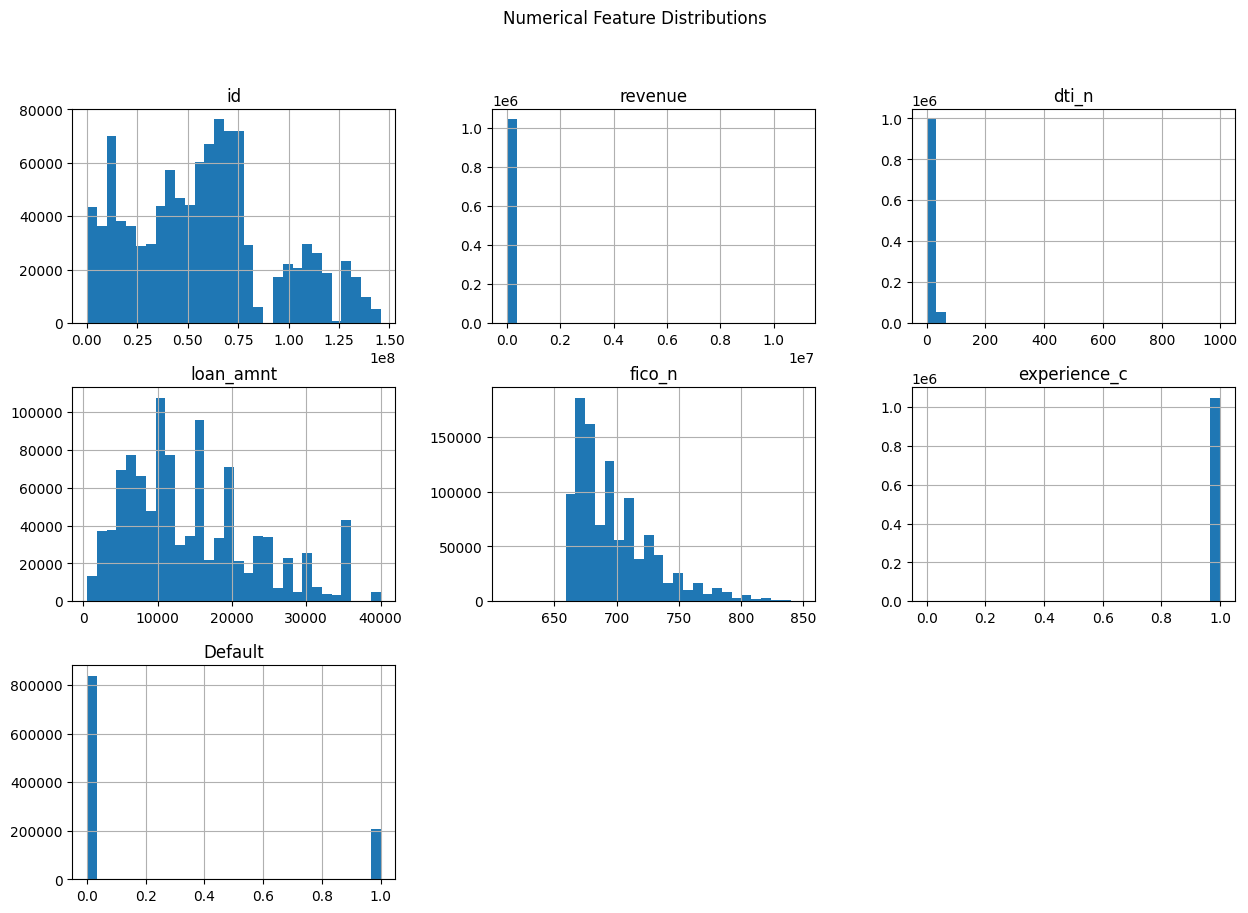

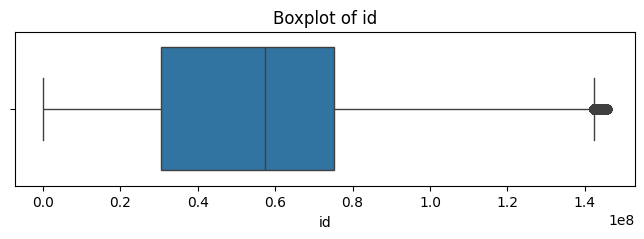

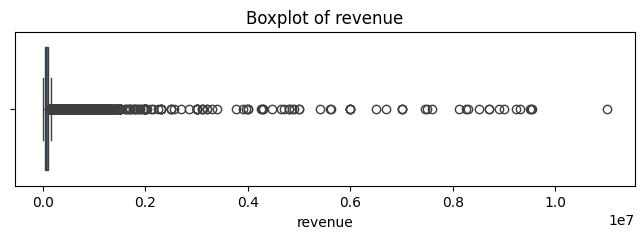

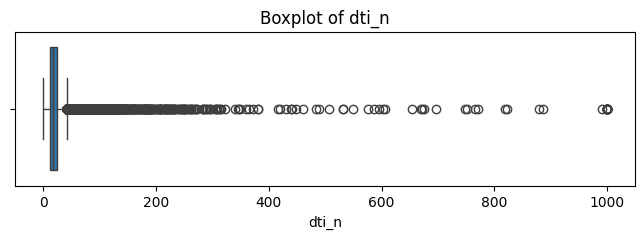

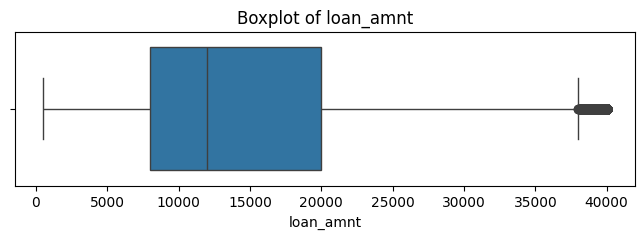

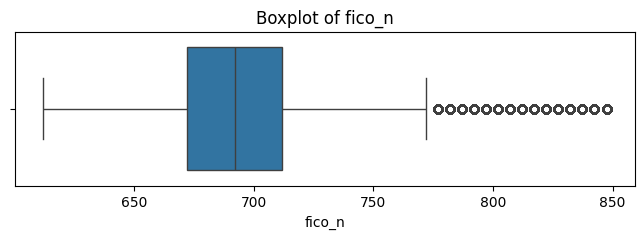

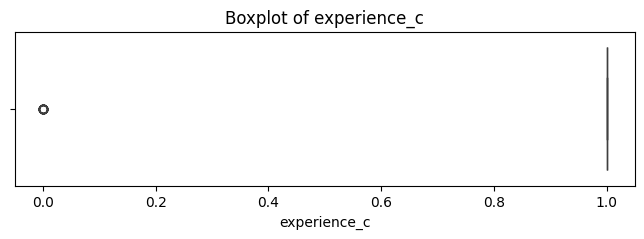

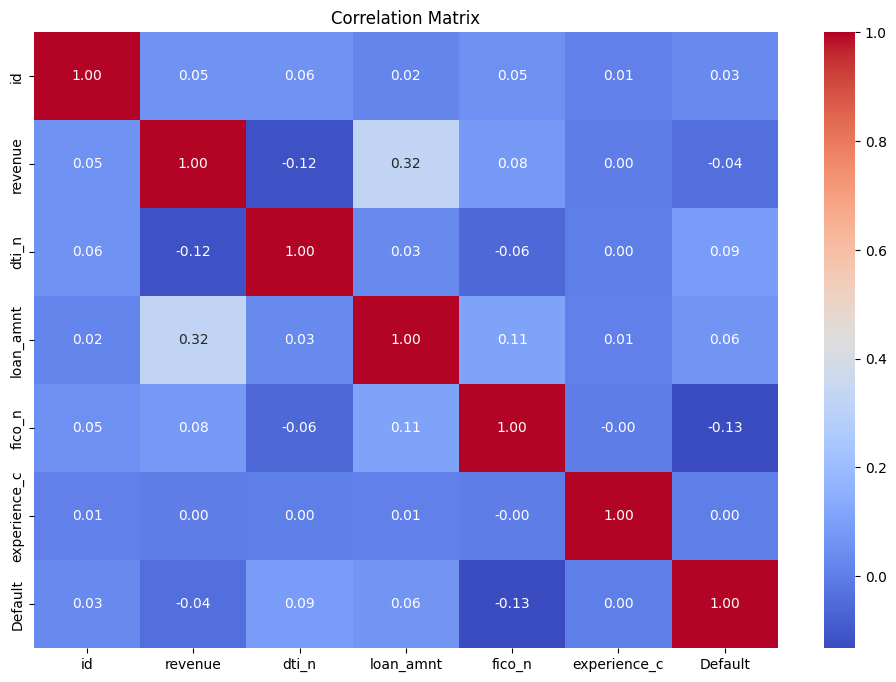

In [11]:
# 3. Feature analysis: numerical distributions and correlation
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numerical columns:', num_cols)

if len(num_cols) > 0:
    df[num_cols].hist(figsize=(15, 10), bins=30)
    plt.suptitle('Numerical Feature Distributions')
    plt.show()

    # Boxplots for outliers (show first 6 to avoid long output)
    for col in num_cols[:6]:
        plt.figure(figsize=(8, 2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print('No numerical columns found.')

In [12]:
# 4. Categorical feature analysis and bias checks
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print('Categorical columns:', cat_cols)

for col in cat_cols[:10]:  # limit to first 10 to keep output manageable
    print(f'\nValue counts for {col}:')
    print(df[col].value_counts().head(20))

# Example demographic bias checks
demographic_cols = [c for c in ['age', 'gender', 'nationality'] if c in df.columns]
for col in demographic_cols:
    plt.figure(figsize=(6,4))
    if df[col].dtype == 'object':
        sns.countplot(x=col, data=df)
    else:
        sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Categorical columns: ['issue_d', 'emp_length', 'purpose', 'home_ownership_n', 'addr_state', 'zip_code', 'title', 'desc']

Value counts for issue_d:
issue_d
Mar-16    48927
Oct-15    42986
Jul-15    41053
Dec-15    39001
Oct-14    36072
Feb-16    34597
Nov-15    32907
Jan-15    32216
Apr-15    31785
Aug-15    31701
May-15    28711
Jan-16    28396
Jul-14    27547
Jun-15    25446
Sep-15    25150
Apr-16    24099
Nov-14    22957
Mar-15    22931
Feb-15    21656
Jun-16    20732
Name: count, dtype: int64

Value counts for emp_length:
emp_length
10+ years    344528
2 years       95121
< 1 year      85874
3 years       84858
1 year        69408
5 years       63290
4 years       62715
NI            62248
8 years       48224
6 years       46457
7 years       45974
9 years       39878
Name: count, dtype: int64

Value counts for purpose:
purpose
debt_consolidation    606338
credit_card           235274
home_improvement       68084
other                  59464
major_purchase         22666
medical    

In [13]:
# 5. Preliminary feature importance using RandomForest
from sklearn.ensemble import RandomForestClassifier

if 'target' in df.columns:
    df_temp = df.copy().dropna()
    X = df_temp.drop('target', axis=1)
    y = df_temp['target']

    # Basic encoding for categorical variables
    for col in X.select_dtypes(include=['object', 'category']).columns:
        X[col] = X[col].astype('category').cat.codes

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    importances = pd.Series(rf.feature_importances_, index=X.columns)
    importances.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,4))
    plt.title('Preliminary Feature Importance (Random Forest)')
    plt.show()
else:
    print("Target column 'target' not found - skip feature importance")

Target column 'target' not found - skip feature importance
